In [1]:
import os
import sys
cwd = os.getcwd()
assert "miriam" in cwd
sys.path.append(cwd + "/..")
import scenarios.generators
import visualization
import solvers

In [2]:
env, starts, goals = scenarios.generators.tracing_pathes_in_the_dark(50, .6, 8, 0)

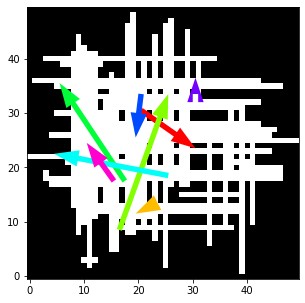

In [3]:
visualization.plot_with_arrows(env, starts, goals)

In [4]:
paths = solvers.indep(env, starts, goals)

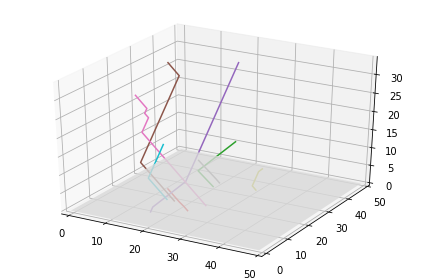

In [5]:
visualization.plot_with_paths(env, paths)